In [124]:
import pandas as pd
path = 'data/datasets.csv'
data = pd.read_csv(path)

In [125]:
# 잘 load 되었는지 확인
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [126]:
data.columns, len(data.columns)

(Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object'),
 35)

In [127]:
# 무의미한 값 drop
data = data.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)
data = data.drop(['MonthlyIncome' ,'YearsInCurrentRole' , 'YearsAtCompany', 'YearsWithCurrManager'],axis=1)
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,8,Yes,11,3,1,0,8,0,1,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,1,No,23,4,4,1,10,3,3,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,6,Yes,15,3,2,0,7,3,3,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,1,Yes,11,3,3,0,8,3,3,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,9,No,12,3,4,1,6,3,3,2


In [128]:
data.columns, len(data.columns)

(Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField',
        'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
        'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
        'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsSinceLastPromotion'],
       dtype='object'),
 27)

In [129]:
data['Attrition'] = data['Attrition'].map({'Yes':1,'No':0})
data['OverTime'] = data['OverTime'].map({'Yes':1,'No':0})
data['Gender'] = data['Gender'].map({'Male':1,'Female':0})

data['BusinessTravel'] = data['BusinessTravel'].map({
    'Travel_Rarely':2,
    'Travel_Frequently':3,
    'Non-Travel':4
})

data['MaritalStatus'] = data['MaritalStatus'].map({
    'Single':2,
    'Married':3,
    'Divorced':4
})

data['Department'] = data['Department'].map({
    'Sales':2,
    'Human Resources':3,
    'Research & Development':4
})

data['EducationField'] = data['EducationField'].map({
    'Life Sciences':2,
    'Medical':3,
    'Marketing':4,
    'Technical Degree':2,
    'Human Resources':3,
    'Other': 4
})

data['JobRole'] = data['JobRole'].map({
    'Sales Executive':2,
    'Manufacturing Director':3,
    'Healthcare Representative':4,
    'Manager':2,
    'Research Director':3,
    'Laboratory Technician':4,
    'Sales Representative':2,
    'Research Scientist':3,
    'Human Resources':4
})

In [130]:
top_features = [
    "TotalWorkingYears",
    "TrainingTimesLastYear",
    "DistanceFromHome",
    "EducationField",
    "MonthlyRate",
    "HourlyRate",
    "YearsSinceLastPromotion",
    "PerformanceRating",
    "PercentSalaryHike",
    "DailyRate",
    "Gender"
]

data = data.drop(columns=top_features,axis=1)
len(data.columns)

16

In [140]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime',
       'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'],
      dtype='object')

In [131]:
#normalizing 
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
DF1 = data.drop(columns=['Attrition'])
norm = scaler.fit_transform(data)
norm_df = pd.DataFrame(norm,columns=data.columns)

In [132]:
X = pd.DataFrame(norm_df.drop(columns='Attrition'))
Y = pd.DataFrame(norm_df.Attrition).values.reshape(-1, 1)

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2, random_state = 0)

In [134]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(X_train,y_train)

In [135]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [136]:
#### XGBoost classifier

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

best_acc = 0.0
best_clf = None
best_model_name = ""
best_params = {}
scoring_list = ['accuracy','recall','f1']
scoring = scoring_list[0]

import numpy as np

xgb_clf = XGBClassifier()
xgb_clf.fit(smote_train, smote_target)

y_pred = xgb_clf.predict(X_test)
print('accuracy',metrics.accuracy_score(y_test, y_pred))

import pickle
with open('xgb.pkl','wb') as f:
    pickle.dump(xgb_clf,f)

accuracy 0.9829931972789115


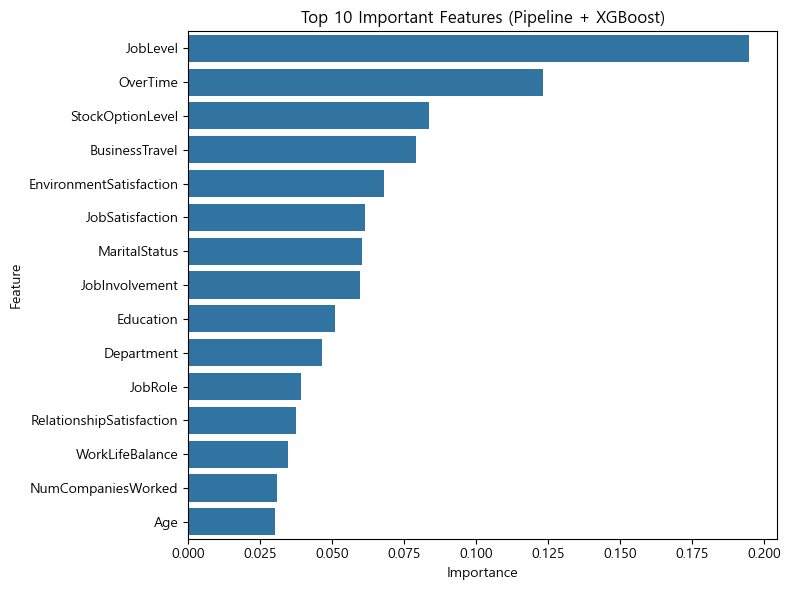

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. feature importance
importances = xgb_clf.feature_importances_

# 4. 중요도 매핑
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# 5. 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=coef_df)
plt.title("Top 10 Important Features (Pipeline + XGBoost)")
plt.savefig("pipeline+xgb.png")
plt.tight_layout()
plt.show()

In [138]:
len(coef_df)

15

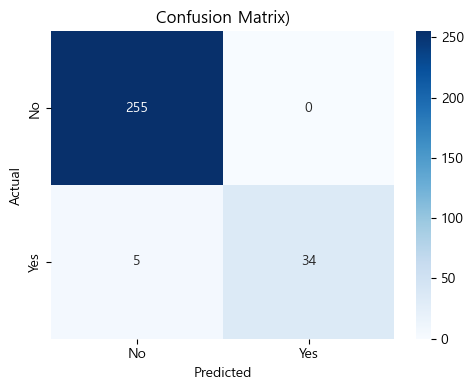

In [139]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix)")
plt.tight_layout()
plt.show()

In [141]:
%pip install shap

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   --------------------------------------- 545.2/545.2 kB 18.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 27.3 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ----------- ---------------------------- 8.9/30.3 MB 42.6 MB/s eta 0:00:01
   ---------------------------- ----------- 21.5/30.3 MB 52.3 MB/s eta 0:00:01
   ---------------------------------------- 30.3/30.3 MB 50.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [142]:
import shap
import numpy as np
import pandas as pd

# 예: 학습할 때 쓰인 피처 순서
feature_columns = [
    'Age', 'BusinessTravel', 'Department', 'Education',
    'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole',
    'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime',
    'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'
]

def predict_with_explanation(sample_input: dict, model, feature_columns: list):
    # 1. 입력을 DataFrame으로 정제 (feature 순서 맞춤)
    X_sample = pd.DataFrame([sample_input])[feature_columns]

    # 2. 예측 수행
    prediction = model.predict(X_sample)[0]
    prediction_proba = model.predict_proba(X_sample)[0][1]

    # 3. SHAP값 계산
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_sample)

    # 4. feature별 영향 정리
    shap_importance = pd.DataFrame({
        'Feature': feature_columns,
        'SHAP_Value': shap_values[0]
    }).sort_values(by='SHAP_Value', key=abs, ascending=False)

    # 5. Top 5 영향 피처 추출
    top5_features = shap_importance.head(5)['Feature'].tolist()

    return {
        "prediction": int(prediction),  # 0 = 잔류, 1 = 퇴사
        "probability": float(prediction_proba),
        "shap_values": shap_importance.to_dict(orient='records'),
        "top5_features": top5_features
    }


c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [145]:
sample = {
    'Age': 35,
    'BusinessTravel': 2,
    'Department': 1,
    'Education': 3,
    'EnvironmentSatisfaction': 2,
    'JobInvolvement': 3,
    'JobLevel': 2,
    'JobRole': 5,
    'JobSatisfaction': 2,
    'MaritalStatus': 1,
    'NumCompaniesWorked': 2,
    'OverTime': 1,
    'RelationshipSatisfaction': 3,
    'StockOptionLevel': 1,
    'WorkLifeBalance': 3
}

result = predict_with_explanation(sample, xgb_clf, feature_columns)

print("퇴사 예측 결과:", result['prediction'])
print("퇴사 확률:", result['probability'])
print("Top 5 영향 피처:", result['top5_features'])


퇴사 예측 결과: 0
퇴사 확률: 0.08505229651927948
Top 5 영향 피처: ['JobLevel', 'NumCompaniesWorked', 'MaritalStatus', 'Age', 'StockOptionLevel']


In [ ]:
Top 5 영향 피처: ['JobLevel', 'NumCompaniesWorked', 'Age', 'MaritalStatus', 'BusinessTravel']
Top 5 영향 피처: ['JobLevel', 'NumCompaniesWorked', 'MaritalStatus', 'Age', 'StockOptionLevel']